# Basic optical character using Tesseract with Python


How to do a basic OCR for a PDF with incomplete or erroneous text information? For this a PDF of an Article is converted to an image and the tesseract package is used for the OCR. 

Tesseract is a popular free OCR-software https://sourceforge.net/projects/tesseract-ocr/. With a python wrapper it can be used to do OCR in python.

Installation of additional python packages (assuming you have the basic anaconda packages installed):

#### basic OCR: install tesseract and opencv
conda install opencv

conda install tesseract -c conda-forge

pip install pytesseract

#### convert pdf to img
pip install pdf2image

#### read PDF
conda install tika

## Example PDF file

As an example we use an article by A. Einstein which can be downloaded here: https://zenodo.org/record/1601163#.XsUtA7tR2EI as a PDF file. The file contains the scanned image of the article and text information. However, the text information contains errors. We will see if we can do better using the picture only and doing OCR with Tesseract.

## Read badly scanned PDF. 

#### First let's have a look at the PDF example

In [1]:
from pdf2image import convert_from_path

In [2]:
# read PDF as image
pages = convert_from_path('article.pdf', 500)

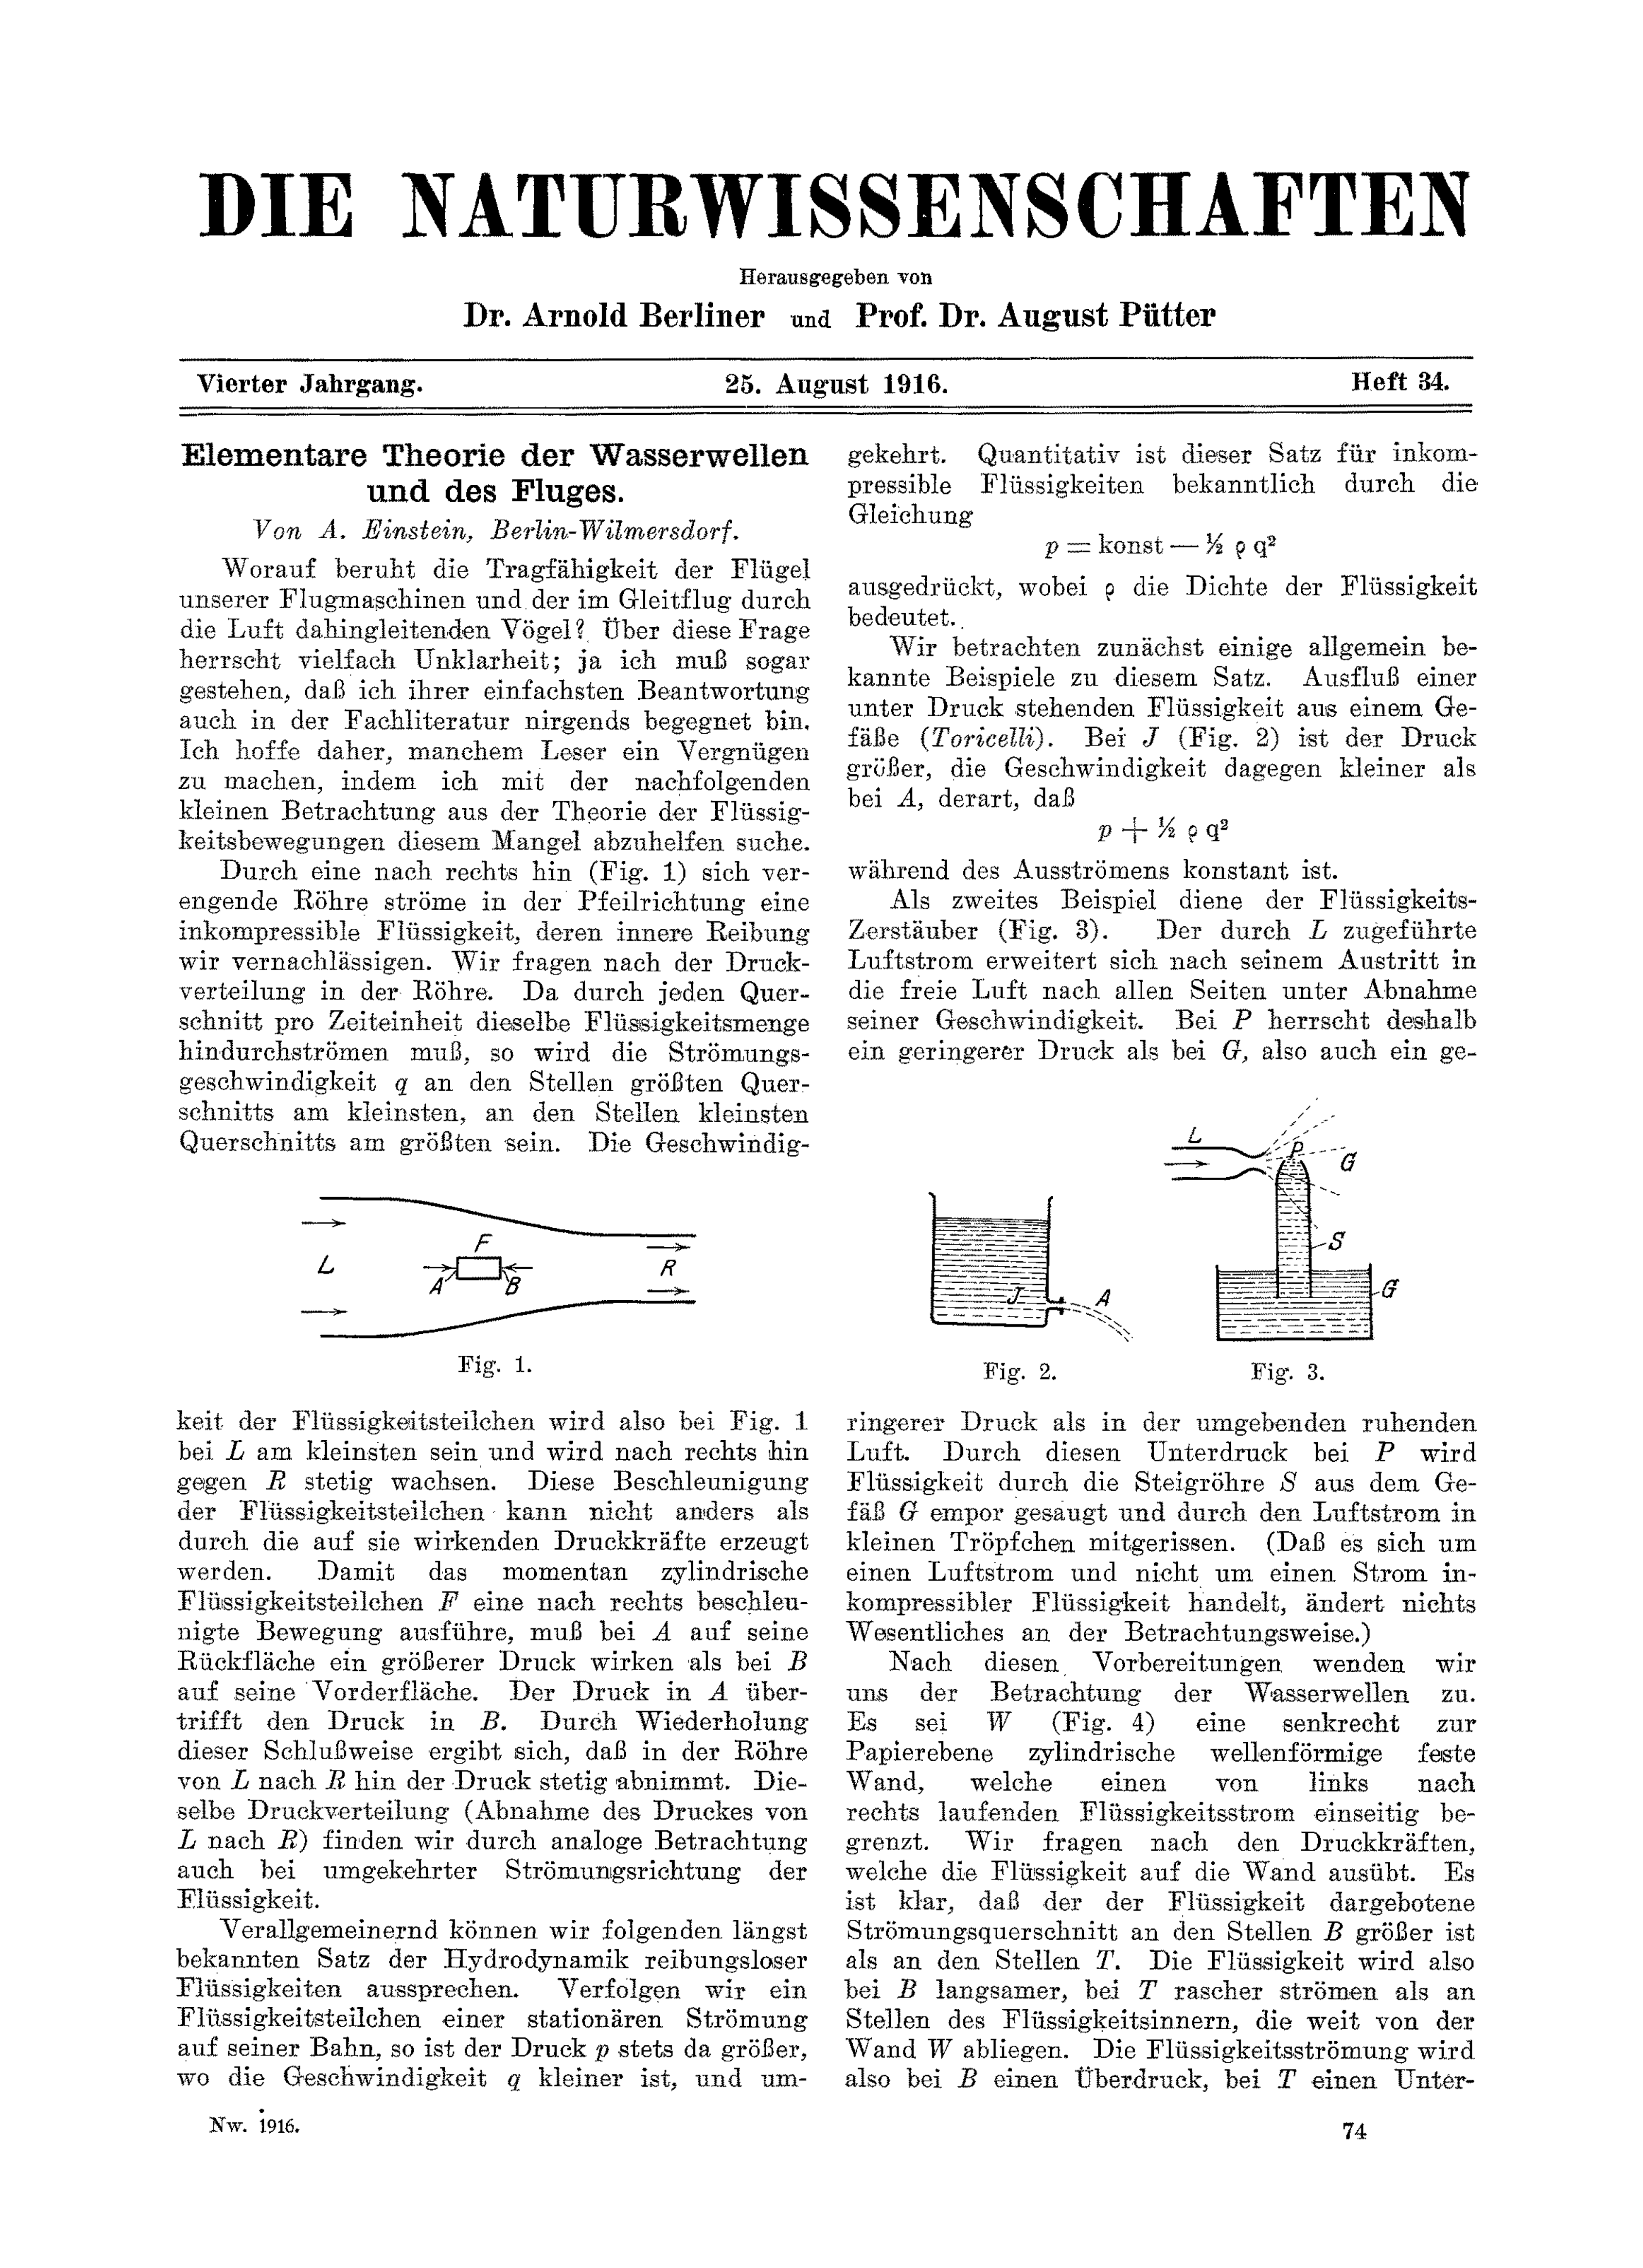

In [3]:
# show first page of pdf as image
pages[0]

## For Comparison: read PDF using TIKA

This part is only to illustrate why we would be interested in optical character recognition for this example. This part can be skipped if you just want to know how to do the OCR. It requires the additional module tika for reading PDFs

In [4]:
# import module for PDF reading
from tika import parser

In [5]:
parsedPDF = parser.from_file('article.pdf')

In [6]:
pdftext = parsedPDF['content']

Now we look at the result below.

In [7]:
print(pdftext)













































Elementare Theorie der Wasserwellen und des Fluges


DIE NATURWISSENSCHAFTEN 
tterausgegeben yon 

Dr. Arnold Berliner ~na Prof. Dr. August Pti~er 

Vierter Jahrgang. 25. August  1916. Heft 34. 

E l e m e n t a r e  T h e o r i e  d e r  W a s s e r w e l l e n  
u n d  d e s  F l u g e s .  

Van A. Einstein, Ber~n-Witm.ersdorf. 
Worauf beruht die Tragf~higkeit tier Fliige! 

unserer Flugmasehinen und der im Gleitflug dutch 
die Luft dahingleitend.en VSgel ? $3ber diese Frage 
herrseht viel£aeh Unklarheit; ja ieh rang sogar 
gestehen, dab ieh ihrer einfachsten Beantwortung 
aueh in der Faehliteratur nirgends begegnet bin, 
Ich hoffe daher, manchem Leser Bin Vergniigen 
zu machen, indem ieh mit der nachfolgenden 
kleinen Betraehtung aus der Theorie tier Fliissig- 
keitsbewegungen diesem ~angel  abzuhelfen sueh e. 

Dureh eine naeh reehts hin (Fig. l) sieh ver- 
engende RShre strSme in der Pfeilrielhtnng eine 
inkompressible Fliissigkeit, der

As you can see there are lots of mistakes!!! Please note that this is not an error in the TIKA-module. TIKA just reads whatever is stored as text in the PDF and does not do any OCR. For good PDFs it works perfectly

# Here the OCR part  starts: 

First import all required packages

In [8]:
# general tools
import os
import numpy as np

In [9]:
# tools for OCR
import cv2
import pytesseract
from PIL import Image
from pytesseract import image_to_string

## Recognize characters from stored image

For this second part you need the PDF as image in JPG format. This can be done in various ways, e.g. using GIMP:https://www.gimp.org (Image handling and format conversion in python will be explained in a separate part of the toolbox.) 

In this first example we have stored the first page of the pdf as "Einstein1916_01.jpg"

In [10]:
# define image name
img_name = "Einstein1916_01.jpg"
# define path where image is stored
src_path = './'

In [11]:
# read image from file
img = cv2.imread(os.path.join(src_path,img_name))

In [12]:
# now we use tesseract for character recognition
extxt = pytesseract.image_to_string(img)

In [13]:
# Print result
print(extxt)

DIE NATURWISSENSCHAFTEN

orauagegeben von

Dr. Arnold Berliner una Prof. Dr. August Piitter

 

Vierter Jahrgang.

25, August 1916.

 

Elementare Theorie der Wasserwellen
und des Fluges.

Von A. Einstein, Berlin-Wilmersdor
Worauf beruht die Tragtihigheit der Fligel
unserer Flugmaschinen und der im Gleitflug durch
dic Luft dahingleitonden Vigel? Uber diese Frage
herrscht vielfech Unklazheit; ja ich muB sogar
gestehen, dal ich ihrer cinfachsten Beantwortung
auch in der Fachliteratur nirgends begognet bin.
Teh hoffe daher, manchem Leser ein Vergntigen
za machen, indem ich mit der nachfolgenden
Kleinen Betrachtung aus der Theorie der Flissig-
keitshewegungen diesem Mangel abzuhelfen suche.
Durch eine nach rechts hin (Fig. 1) sich ver-
engende Rohre stréme in der Pfeilvichtung eine
inkompressible Flissigkeit, deren innore Reibung
wir vernachlissigen. Wir fragen nach der Drack-
verteilung in der Rohe. Da dureh jeden Quer-
schnitt pro Zoiteinheit dieselbe Flissigkeitsmenge
hindurehstrémen mu

This is slightly better, but there are still a lot of mistakes. Can we do better?

### Select language for character recognition

One reason for the bad quality is the fact that language-specific characters (German) are not recognized correctly. We can change this by loading the correct language data

In [14]:
# tesseract character recognition with german language data
extxt = pytesseract.image_to_string(img, lang='deu')

In [15]:
# Print result
print(extxt)

DIE NATURWISSENSCHAFTEN

Herausgegeben von

Dr. Arnold Berliner una Prof. Dr. August Pütter

 

Vierter Jahrgang.

25. August 1916.

 

Elementare Theorie der Wasserwellen
und des Fluges.

Von A. Einstein, Berlin-Wilmersdor
Worauf beruht die Tragfähigkeit der Flügel
unserer Flugmaschinen und der im Gleitflug durch
die Luft dahingleitenden Vögel? Über diese Frage
herrscht vielfach Unklarheit; ja ich muß sogar
gestehen, daß ich ihrer einfachsten Beantwortung
auch in der Fachliteratur nirgends begegnet bin.
Ich hoffe daher, manchem Leser ein Vergnügen
zu machen, indem ich mit der nachfolgenden
kleinen Betrachtung aus der Theorie der Flüssig-
keitsbewegungen diesem Mangel abzuhelfen suche.
Durch eine nach rechts hin (Fig. 1) sich ver-
engendo Röhre ströme in der Pfeilrichtung eine
inkompressible Flüssigkeit, deren innere Reibung
wir vernachlässigen. Wir fragen nach der Druck-
verteilung in der Röhre. Da durch jeden Quer-
schnitt pro Zeiteinheit dieselbe Flüssigkeitsmenge
hindurchströmen mu

Much better! This was the main Mistake! There are still some small errors, but the quality is good enough for text mining or stylometry.

## OCR for entire PDF + additional improvements 

Now we read all the pages (in this case just two) from the PDF. The OCR is slightly improved by adding some image conversion steps (this is not so important here, but may be useful in case of bad image quality). In the end we assemble the text from the PDF into one string, which could then be used e.g. to search for specific expressions.

In [16]:
# first we read all the pdf pages (see above)
pages = convert_from_path('article.pdf', 500)

In [17]:
# now we do image conversion and OCR for all pages
textpages = []
for n,page in enumerate(pages):
    open_cv_image = np.array(page)
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    # Convert to gray
    img = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)
    # OCR, again using the german language set
    extxt = pytesseract.image_to_string(img,lang='deu')
    # Store Text
    textpages.append(extxt)

In [18]:
# Assemble document text
text = textpages[0] + textpages[1]

In [19]:
# Print document text
print(text)

DIE NATURWISSENSCHAFTEN

Herausgegeben von

Dr. Arnold Berliner una Prof. Dr. August Pütter

 

Vierter Jahrgang.

Elementare Theorie der Wasserwellen
und des Fluges.
Von A. Einstein, Berlin-Wilmersdorf.

Worauf beruht die Tragfähigkeit der Flügel
unserer Flugmaschinen und der im Gleitflug durch
die Luft dahingleitenden Vögel? Über diese Frage
herrscht vielfach Unklarheit; ja ich muß sogar
gestehen, daß ich ihrer einfachsten Beantwortung
auch ın der Fachliteratur nirgends begegnet bin.
Ich hoffe daher, manchem Leser ein Vergnügen
zu machen, indem ich mit der nachfolgenden
kleinen Betrachtung aus der Theorie der Flüssig-
keitsbewegungen diesem Mangel abzuhelfen suche.

Durch eine nach rechts hin (Fig. 1) sich ver-
engende Röhre ströme in der Pfeilrichtung eine
inkompressible Flüssigkeit, deren innere Reibung
wir vernachlässigen. Wir fragen nach der Druck-
verteilung in der Röhre. Da durch jeden Quer-
schnitt pro Zeiteinheit dieselbe Flüssigkeitsmenge
hindurchströmen muß, so wird die Str